In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
csv_filename = 'Step1output.csv'
df = pd.read_csv(csv_filename)
df

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


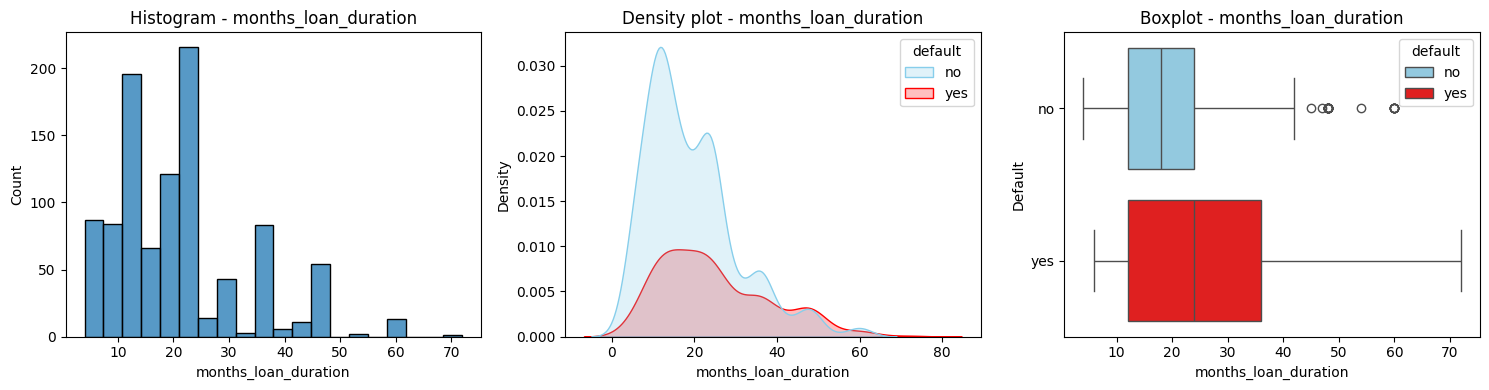

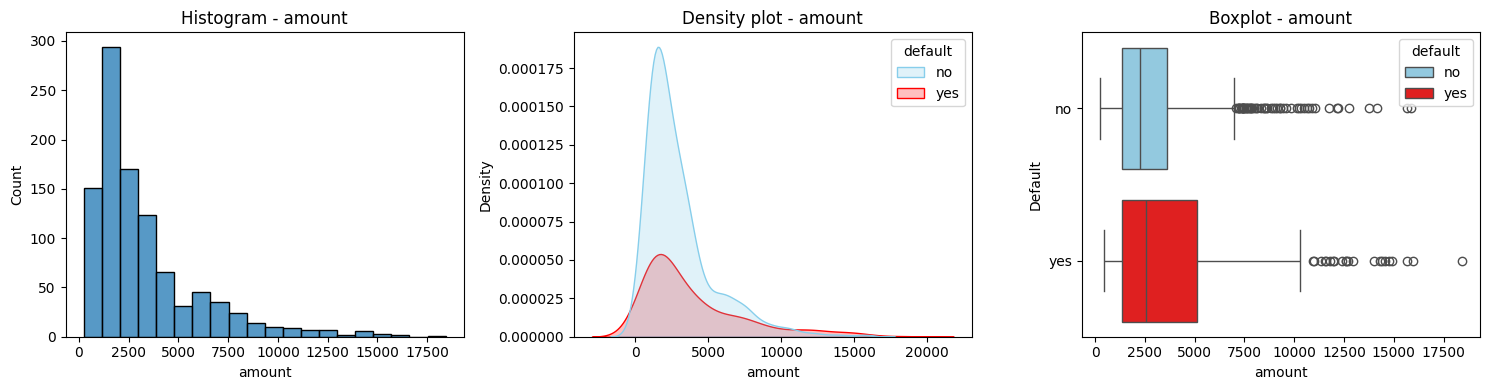

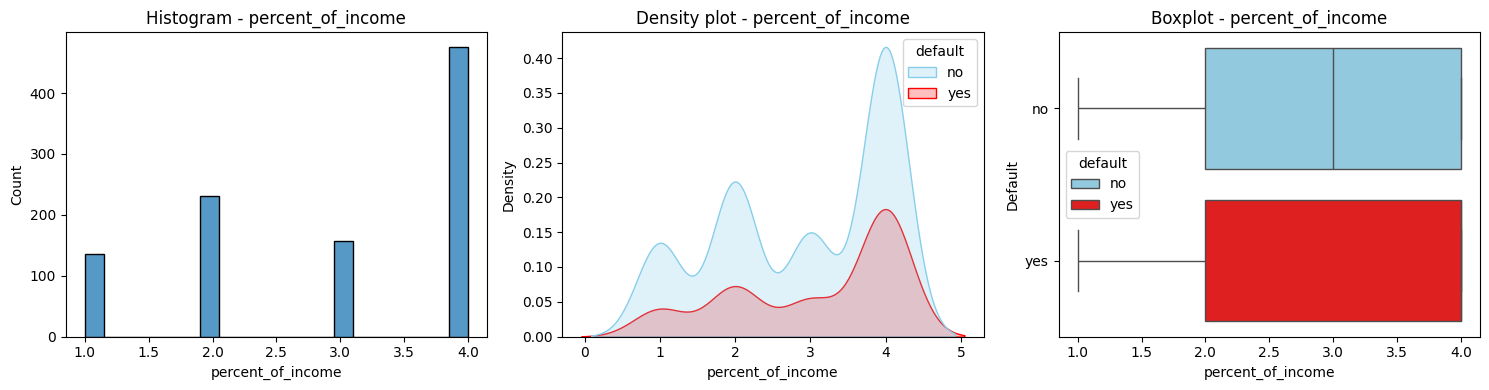

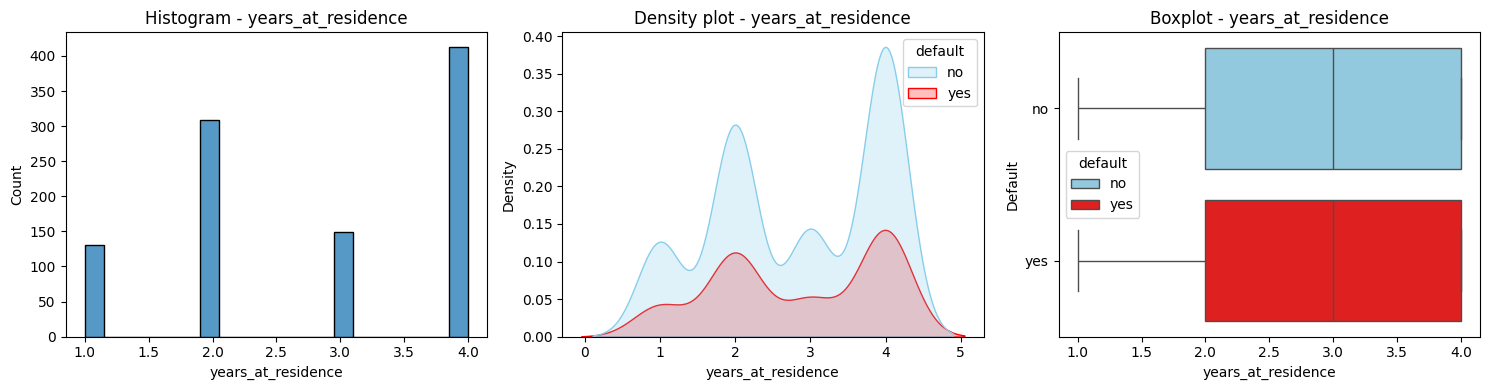

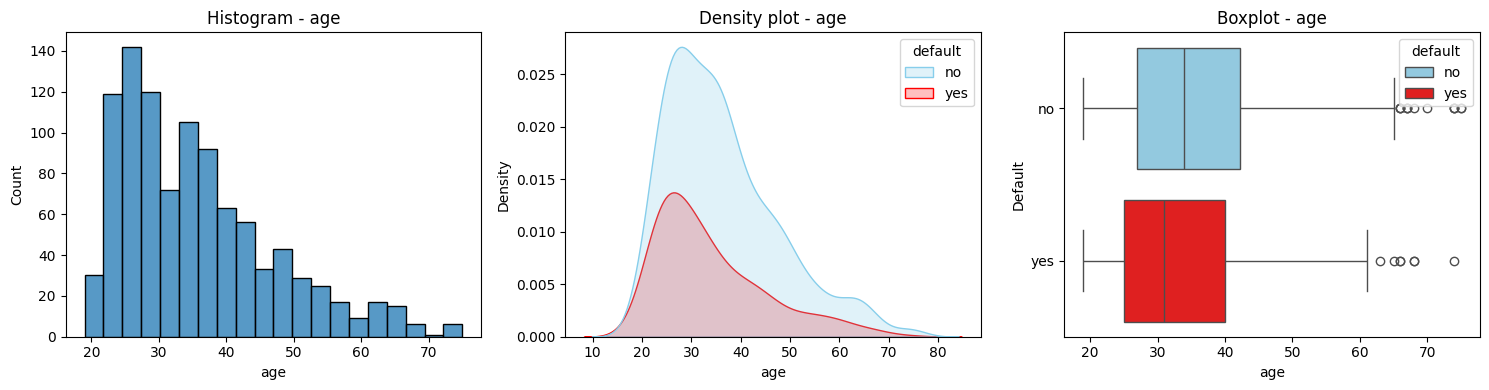

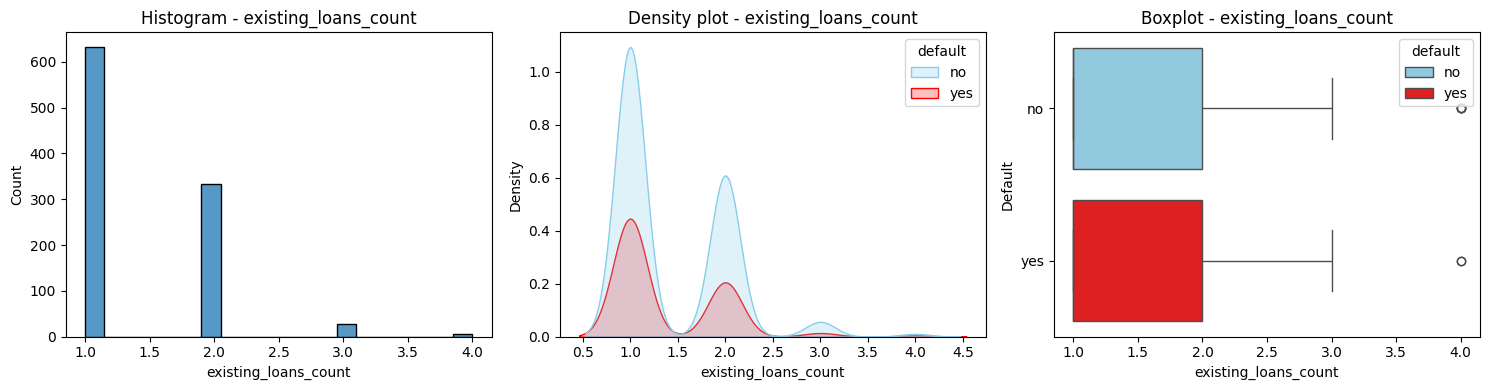

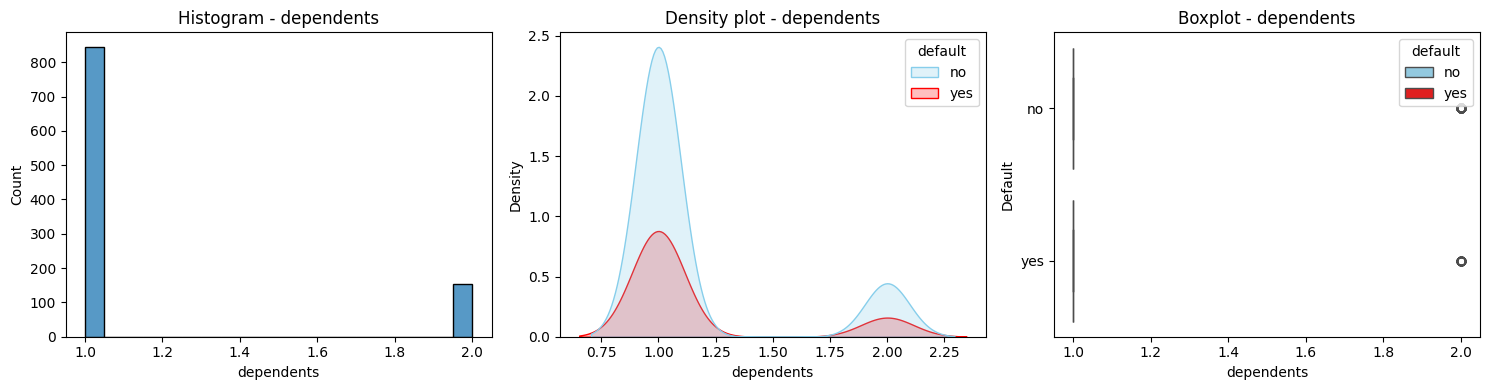

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Select only numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Histogram, Density plot (hue='default') & Boxplots (hue='default') for each numerical column
for numerical_variable in numerical_columns.columns:
    # Create a figure with subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
    
    # Histogram without any hue='default'
    sns.histplot(data=df, x=numerical_variable, ax=ax1, bins=20, kde=False)
    ax1.set_title(f'Histogram - {numerical_variable}')
    
    # Kernel density with hue='default'
    sns.kdeplot(data=df, x=numerical_variable, hue='default', ax=ax2, fill=True,
                palette={'yes': 'red', 'no': 'skyblue'})
    ax2.set_title(f'Density plot - {numerical_variable}')
    
    # Boxplot with hue='default'
    sns.boxplot(data=df, x=numerical_variable, y='default', hue='default', ax=ax3,
                palette={'yes': 'red', 'no': 'skyblue'}, legend=True)
    ax3.set_title(f'Boxplot - {numerical_variable}')
    ax3.set_ylabel('Default')

    # Adjust layout
    plt.tight_layout()
    plt.show()

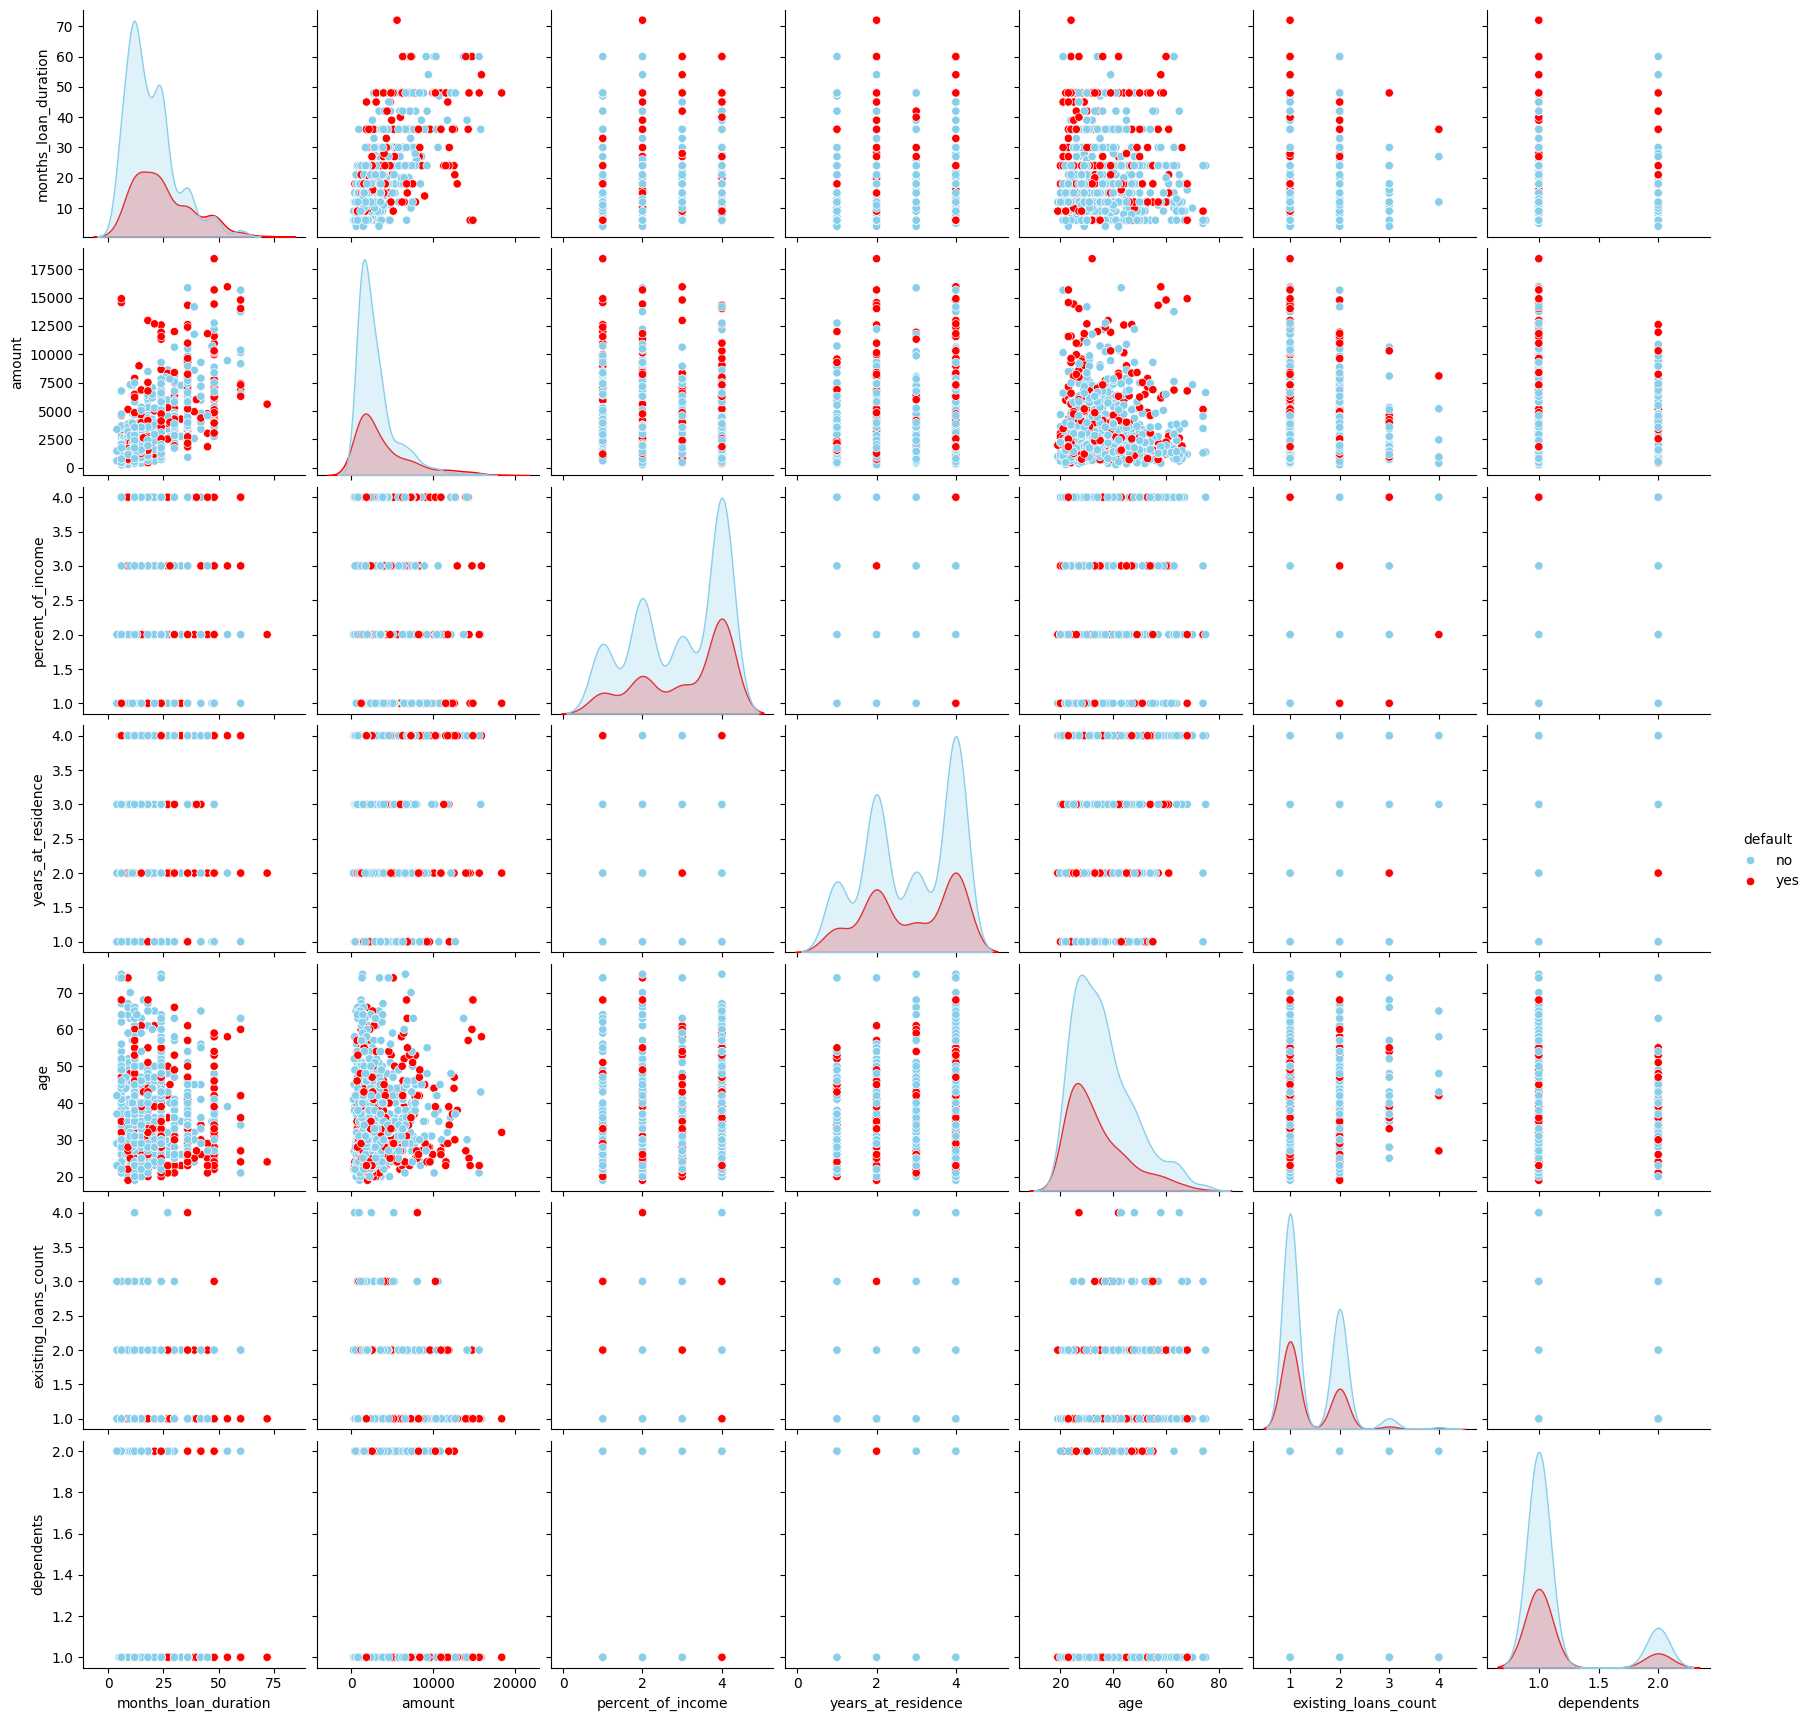

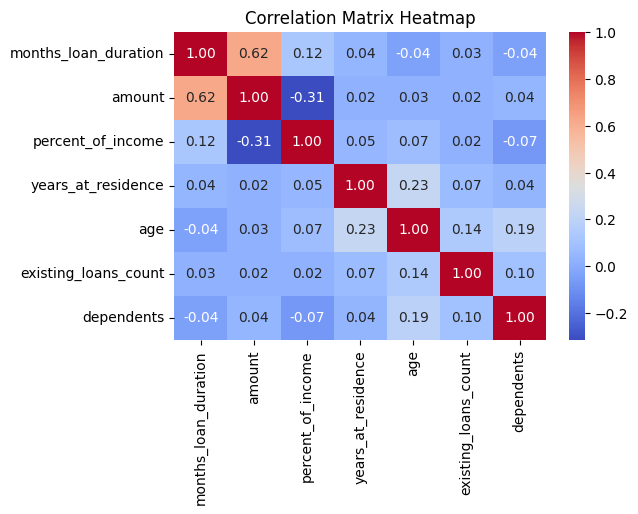

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
months_loan_duration,1.000000,0.624709,0.118046,0.043671,-0.036316,0.028430,-0.043265
amount,0.624709,1.000000,-0.313100,0.023646,0.026298,0.023778,0.041815
percent_of_income,0.118046,-0.313100,1.000000,0.047507,0.072157,0.020997,-0.072543
years_at_residence,0.043671,0.023646,0.047507,1.000000,0.234709,0.067193,0.040455
age,-0.036316,0.026298,0.072157,0.234709,1.000000,0.141287,0.190651
existing_loans_count,0.028430,0.023778,0.020997,0.067193,0.141287,1.000000,0.096978
dependents,-0.043265,0.041815,-0.072543,0.040455,0.190651,0.096978,1.000000


In [14]:
# Pairplot for numerical features with 'default' as the hue
sns.pairplot(df, hue='default', palette={'yes': 'red', 'no': 'skyblue'})
plt.show()

# Calculate the correlation matrix (no sign of linearity = Spearman correlation for non-linearity)
correlation_matrix = numerical_columns.corr(method='spearman')

# Heatmap of the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

correlation_matrix

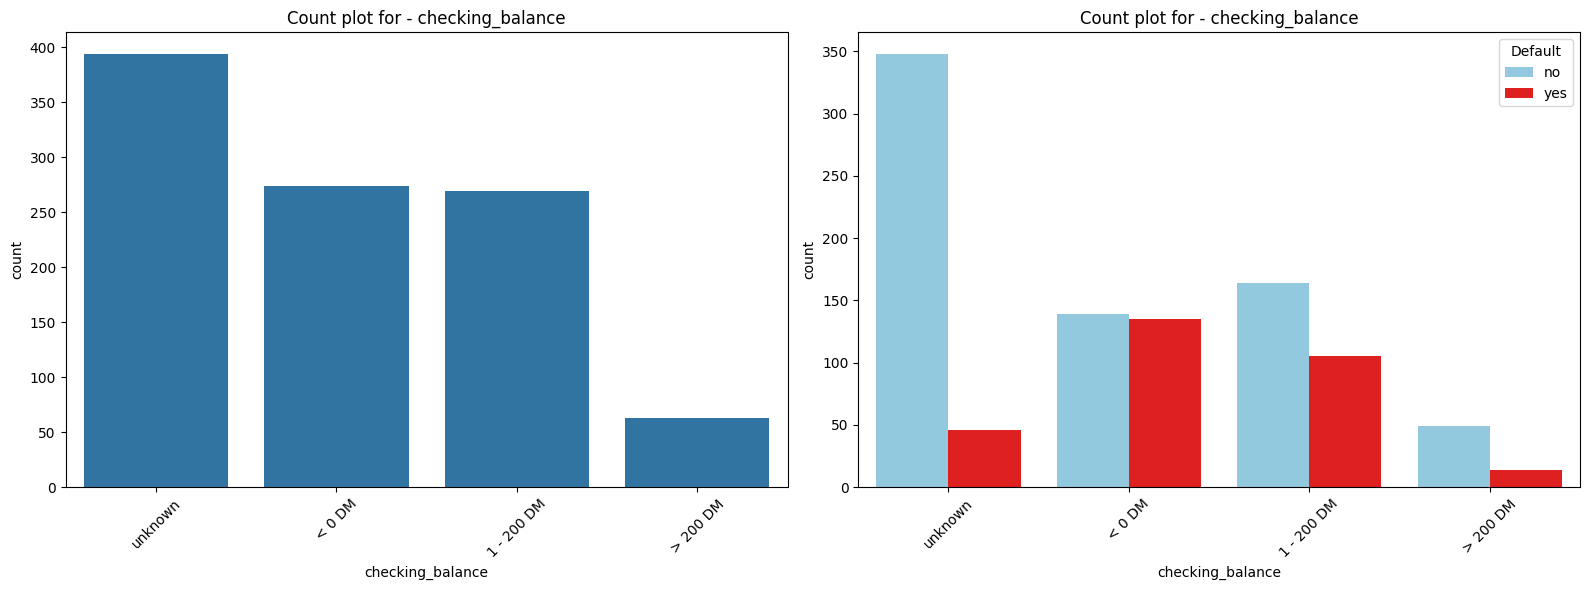

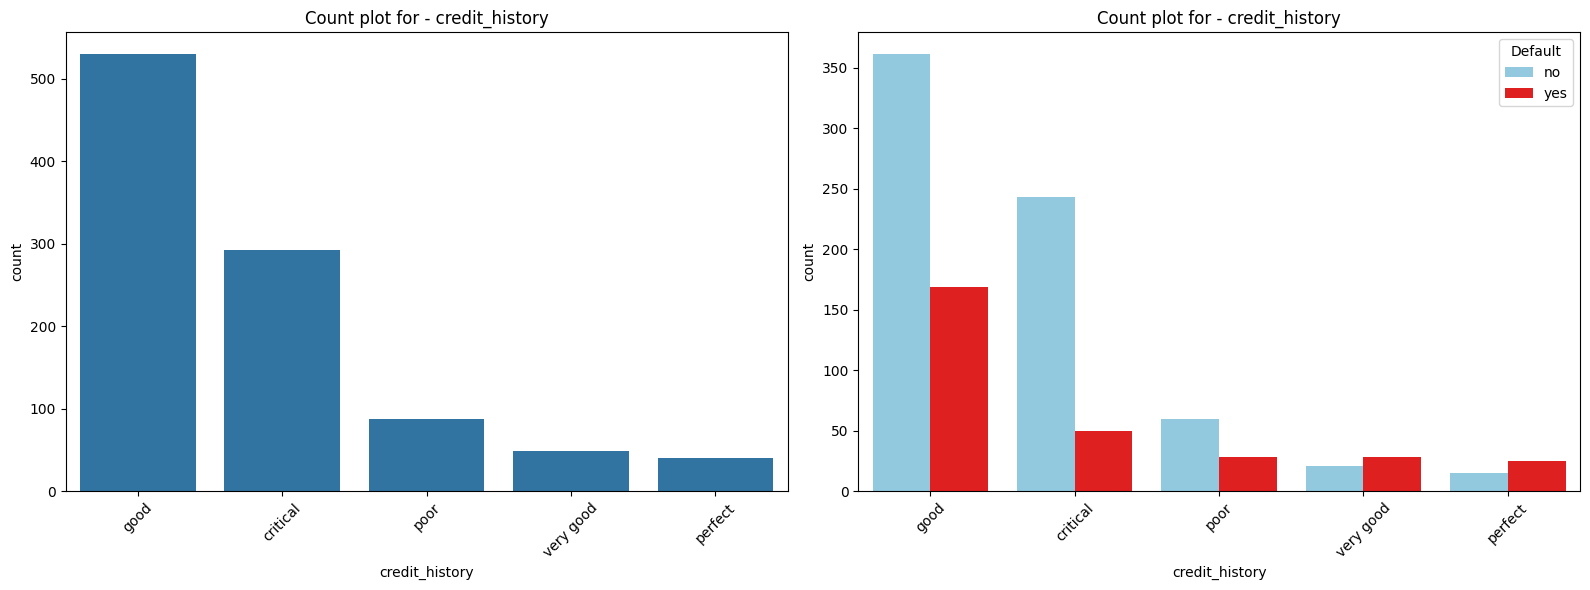

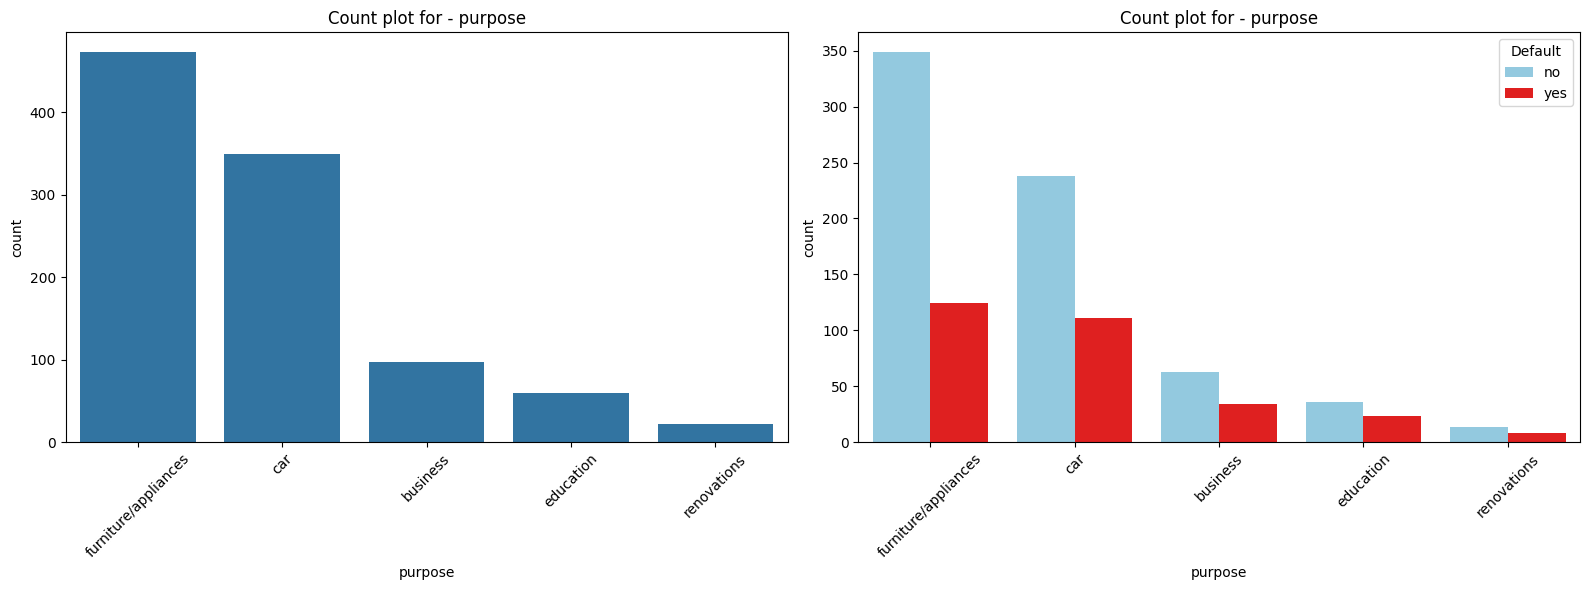

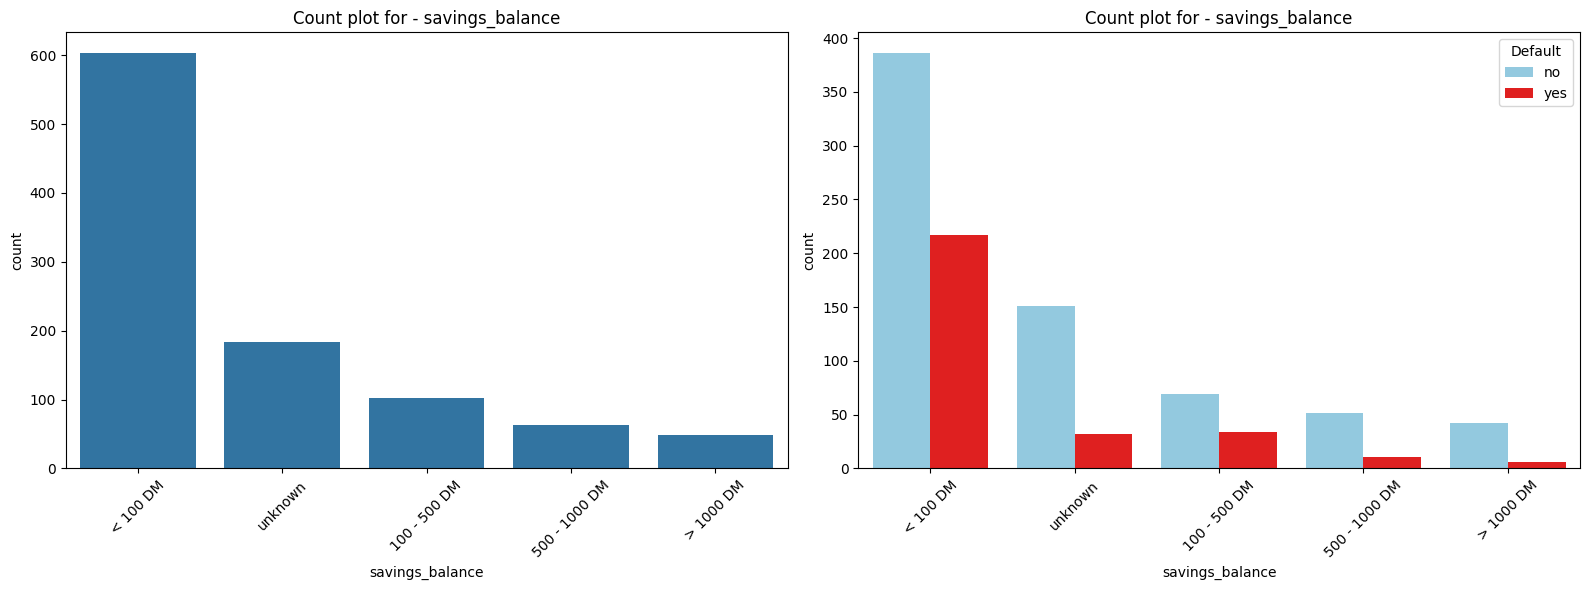

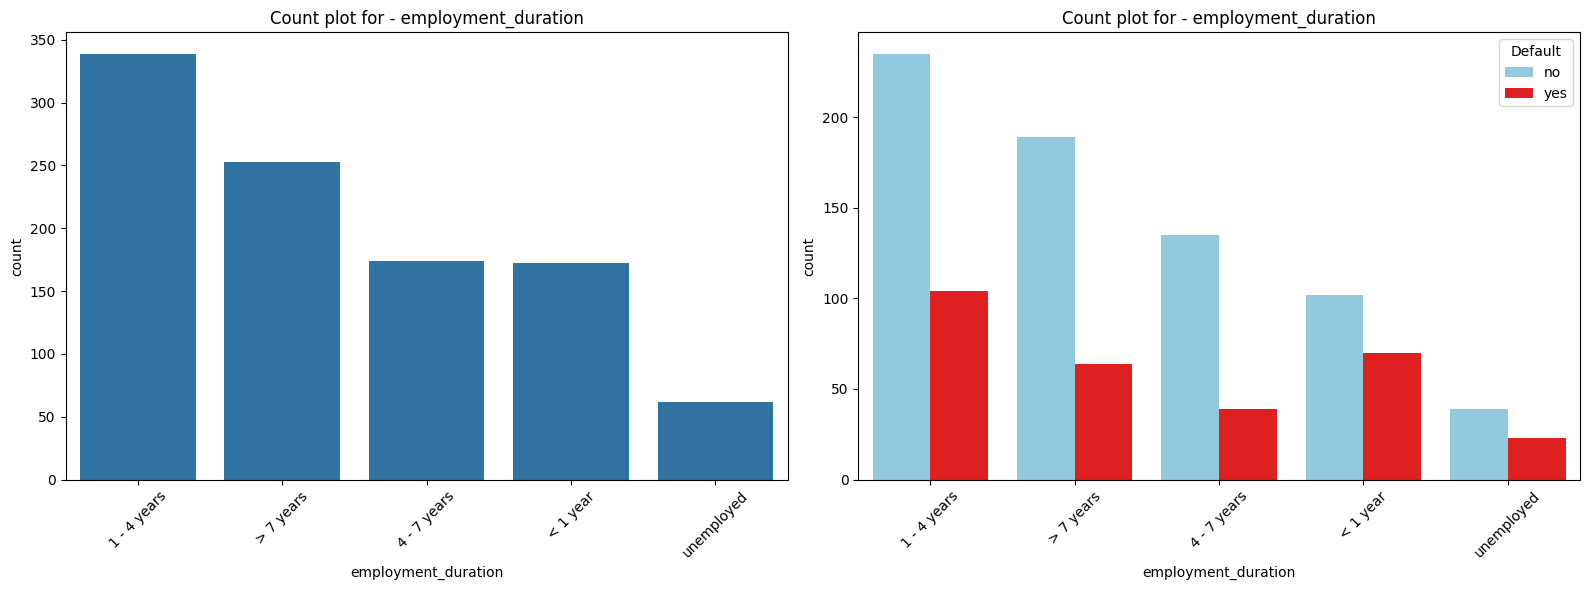

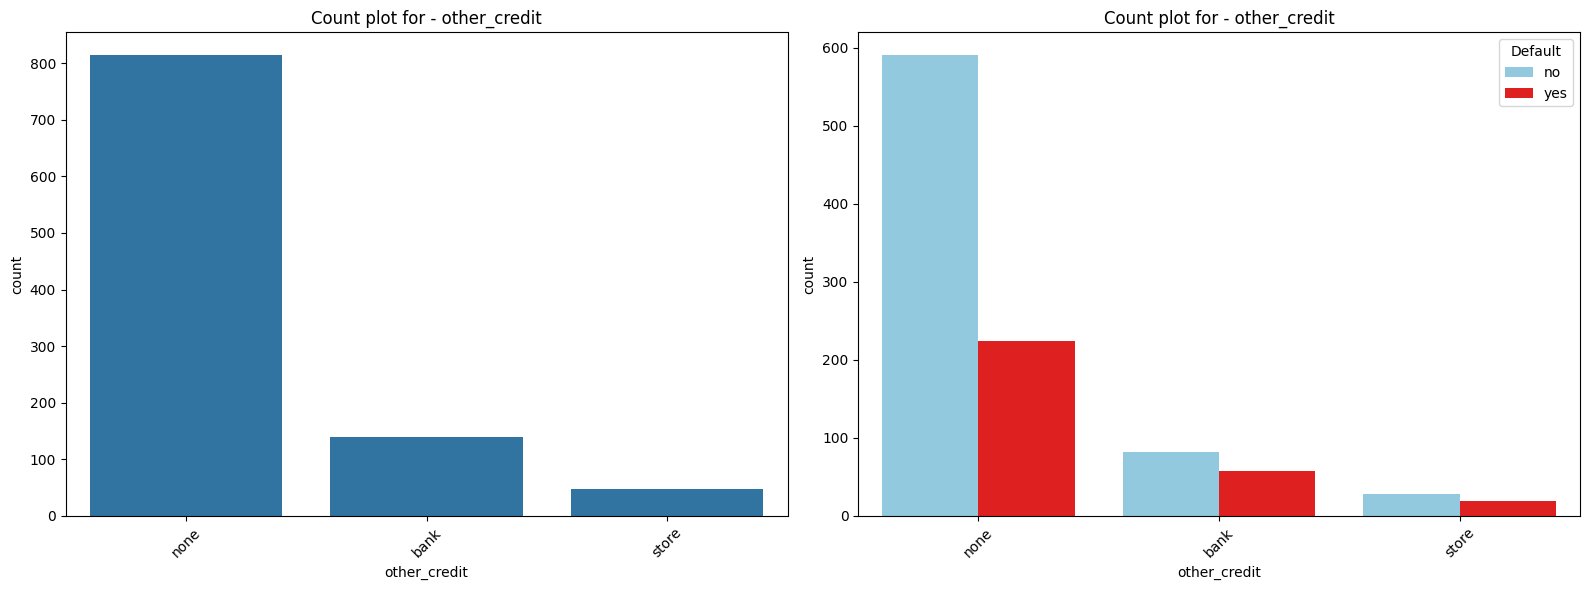

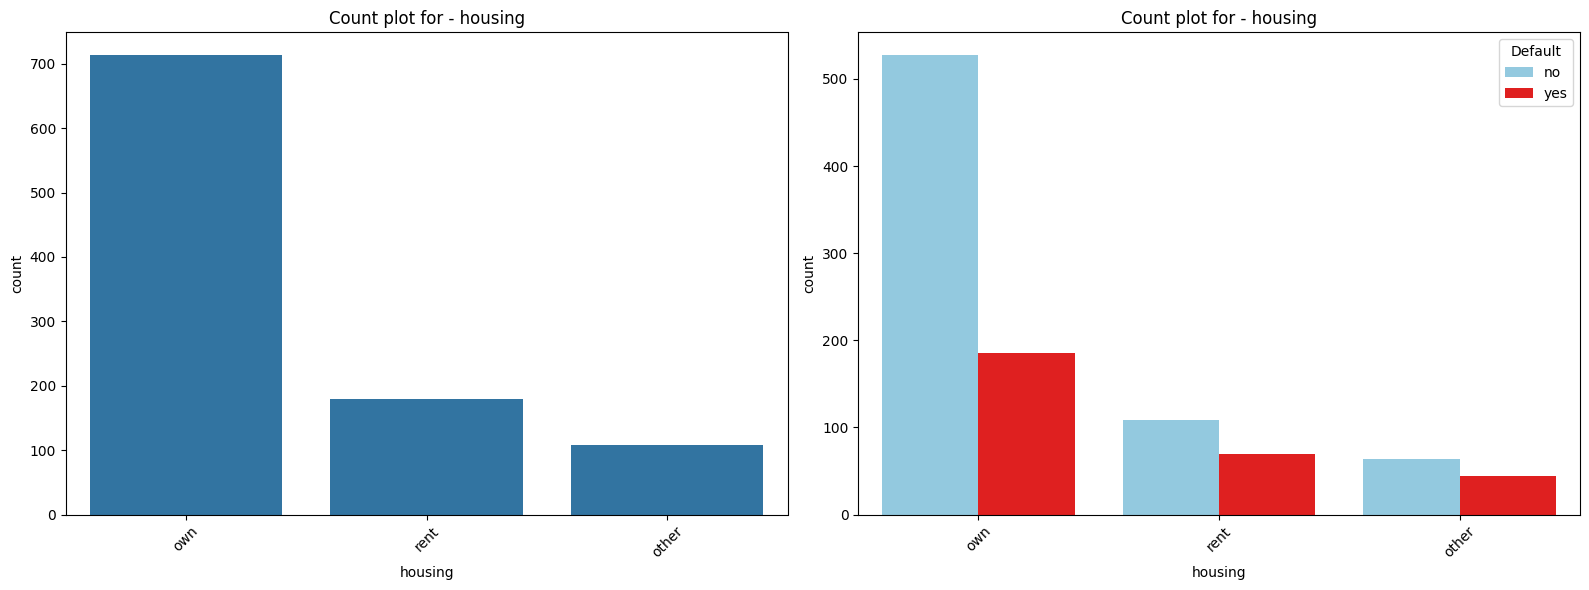

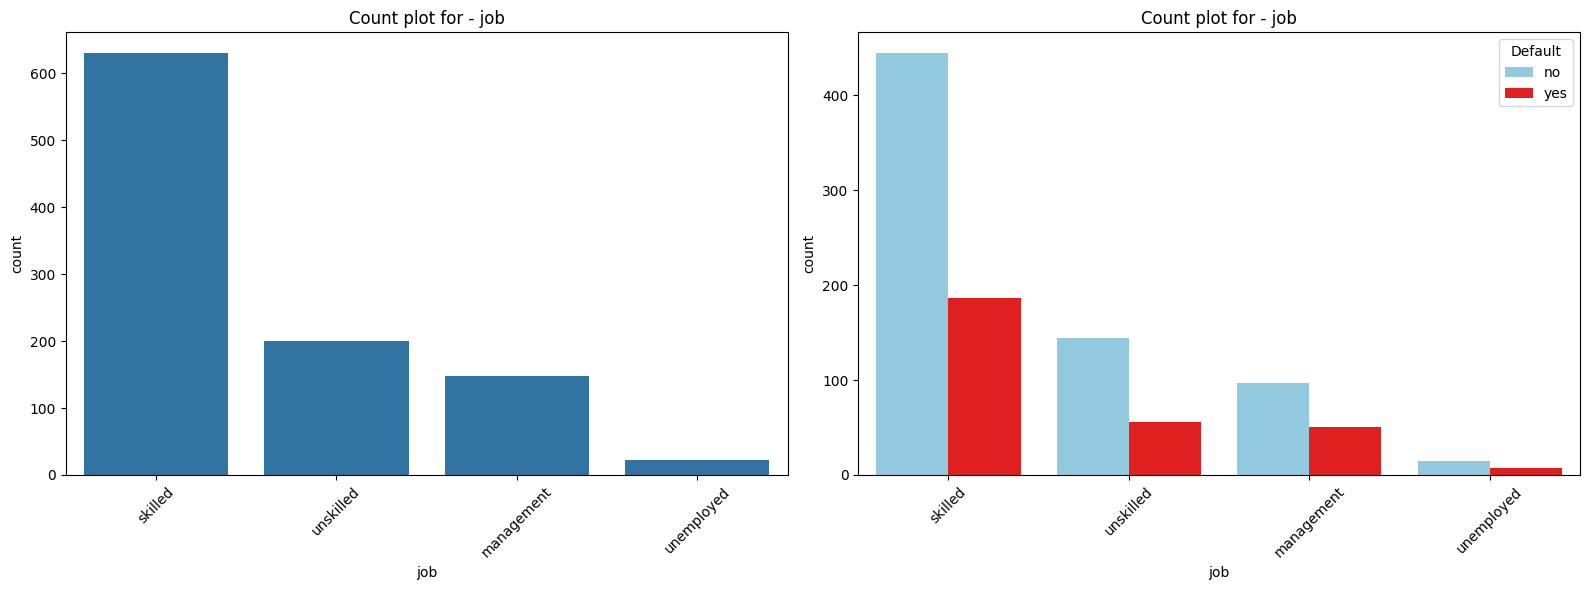

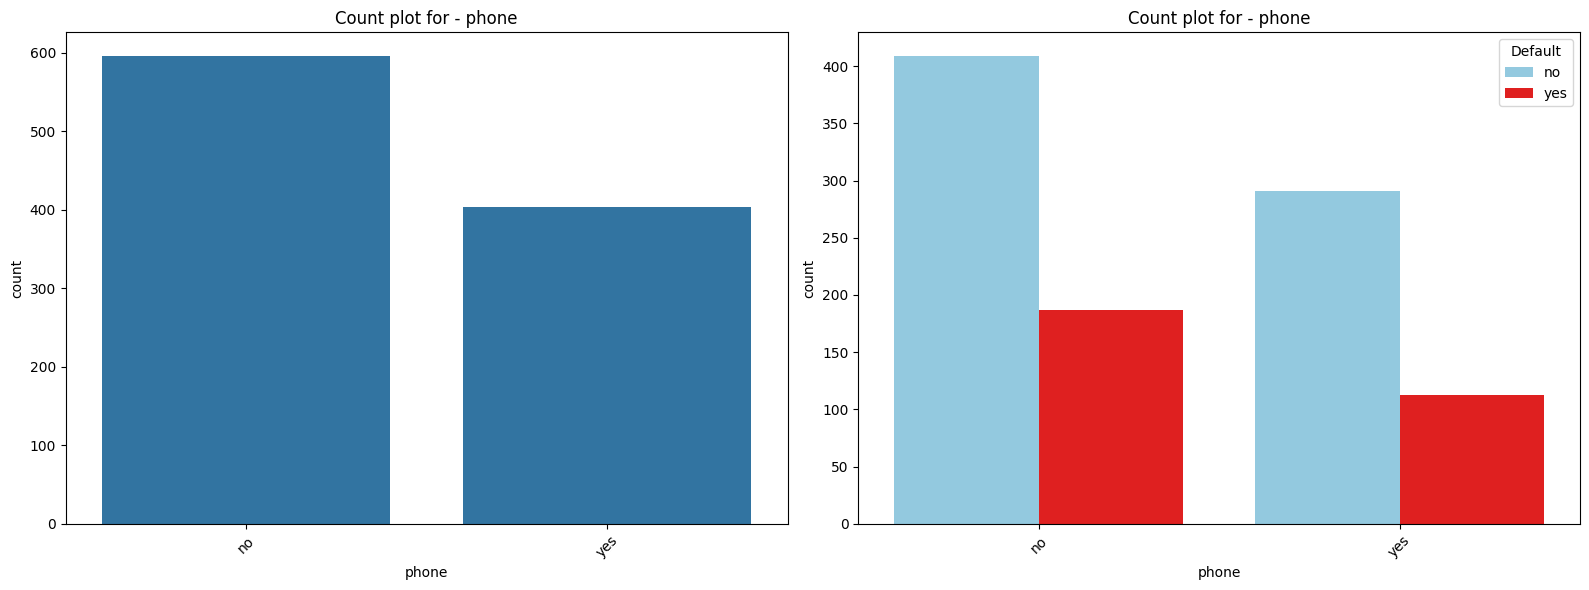

In [15]:
# Select only categorical columns (exclude 'default' column)
categorical_columns = df.select_dtypes(include=['object'])
categorical_columns = categorical_columns.drop(columns=['default'])

# EDA for each categorical column with and without 'default' as the hue
for categorical_variable in categorical_columns.columns:
    plt.figure(figsize=(16, 6))
    
    # Count plot without hue='default' (sort by descending order)
    plt.subplot(1, 2, 1)  # First subplot
    sns.countplot(data=df, x=categorical_variable,
                  order=df[categorical_variable].value_counts().index)
    plt.title(f'Count plot for - {categorical_variable}')
    plt.xticks(rotation=45)
    
    # Count plot with hue='default' (sort by descending order)
    plt.subplot(1, 2, 2)  # Second subplot
    sns.countplot(data=df, x=categorical_variable, hue='default',
                  order=df[categorical_variable].value_counts().index,
                  palette={'yes': 'red', 'no': 'skyblue'})
    plt.title(f'Count plot for - {categorical_variable}')
    plt.xticks(rotation=45)
    plt.legend(title='Default', loc='upper right')
    
    plt.tight_layout()
    plt.show()
